In [1]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

     |████████████████████████████████| 320 kB 20.4 MB/s 
     |████████████████████████████████| 636 kB 49.5 MB/s 
     |████████████████████████████████| 120 kB 62.7 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 167 kB 61.9 MB/s 
     |████████████████████████████████| 6.8 MB 52.0 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 61.6 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 16.8 MB 49.9 MB/s 
     |████████████████████████████████| 1.7 MB 76.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 74.9 MB/s 
     |████████████████████████████████| 10.9 MB 61.4 MB/s 
     |████████████████████████████████| 690 kB 45.6 MB/s 
     |███████████████

In [2]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Preparação

In [4]:
df_train_values = pd.read_csv("train_values.csv")

In [5]:
df_train__label_values = pd.read_csv("train_labels.csv")

In [6]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_train__label_values.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [8]:
print(df_train_values.shape)
print(df_train__label_values.shape)

(163186, 39)
(260601, 2)


In [9]:
df_train = pd.merge(df_train_values,df_train__label_values,how='inner',on='building_id')

In [10]:
print(df_train_values.shape)
print(df_train__label_values.shape)
print(df_train.shape)

(163186, 39)
(260601, 2)
(163186, 40)


In [11]:
df_train.damage_grade.value_counts()

2    92782
3    54642
1    15762
Name: damage_grade, dtype: int64

In [12]:
target = []

for n in df_train.damage_grade:
    if n == 1:
        target.append(0)
    elif n == 2:
        target.append(1)
    elif n == 3:
        target.append(2)

In [13]:
df_train["damage_grade"] = target

In [14]:
df_train.damage_grade.value_counts()

1    92782
2    54642
0    15762
Name: damage_grade, dtype: int64

# Treinamento 1

In [ ]:
clf1 = setup(data = df_train, target = 'damage_grade', session_id = 786, silent = True, use_gpu=True)

,Description,Value
0,session_id,786
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(260601, 40)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
%%time
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7080,0.8042,0.6093,0.7086,0.6983,0.4391,0.4496
1,0.7112,0.8072,0.6128,0.7137,0.7008,0.4429,0.4551
2,0.7078,0.8000,0.6038,0.7094,0.6968,0.4358,0.4484
3,0.7106,0.8046,0.6049,0.7118,0.7001,0.4420,0.4533
4,0.7120,0.8045,0.6073,0.7123,0.7021,0.4464,0.4568
5,0.7128,0.8014,0.6147,0.7133,0.7035,0.4493,0.4594
6,0.7056,0.8035,0.6020,0.7059,0.6952,0.4334,0.4444
7,0.7146,0.8078,0.6173,0.7155,0.7053,0.4525,0.4630
8,0.7110,0.8060,0.6110,0.7123,0.7011,0.4442,0.4554


CPU times: user 2min 17s, sys: 689 ms, total: 2min 17s
Wall time: 1min 28s


In [ ]:
%%time
tunned_model = tune_model(best_model, optimize = 'F1', n_iter = 110)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7335,0.8328,0.6553,0.7326,0.7281,0.4982,0.5037
1,0.7398,0.8357,0.6595,0.7401,0.7338,0.5078,0.5147
2,0.7345,0.8317,0.6542,0.7339,0.7288,0.4994,0.5056
3,0.7417,0.8369,0.6578,0.7411,0.7359,0.5123,0.5183
4,0.7358,0.8326,0.6515,0.7350,0.7300,0.5015,0.5076
5,0.7378,0.8336,0.6507,0.7375,0.7314,0.5037,0.5107
6,0.7340,0.8337,0.6513,0.7332,0.7282,0.4983,0.5043
7,0.7386,0.8378,0.6593,0.7377,0.7333,0.5080,0.5133
8,0.7419,0.8363,0.6651,0.7419,0.7364,0.5133,0.5196


CPU times: user 11min 7s, sys: 10.4 s, total: 11min 17s
Wall time: 2h 44min 33s


In [16]:
df_test_values = pd.read_csv("test_values.csv")

In [ ]:
predict_model(best_model, data=df_test_values).Label.value_counts()

1    59312
2    22255
0     5301
Name: Label, dtype: int64

In [ ]:
tunned_model

LGBMClassifier(bagging_fraction=0.8, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=91, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=300, n_jobs=-1, num_leaves=100, objective=None,
               random_state=786, reg_alpha=0.01, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

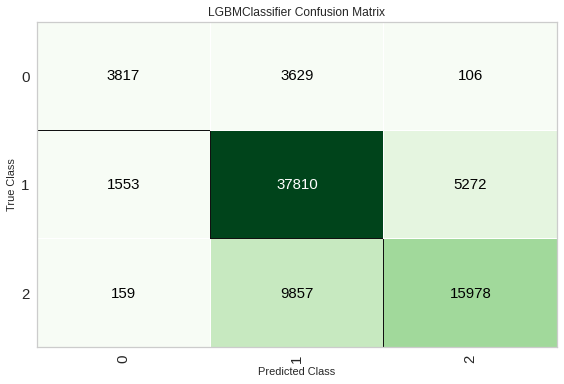

In [ ]:
plot_model(tunned_model, plot = 'confusion_matrix')

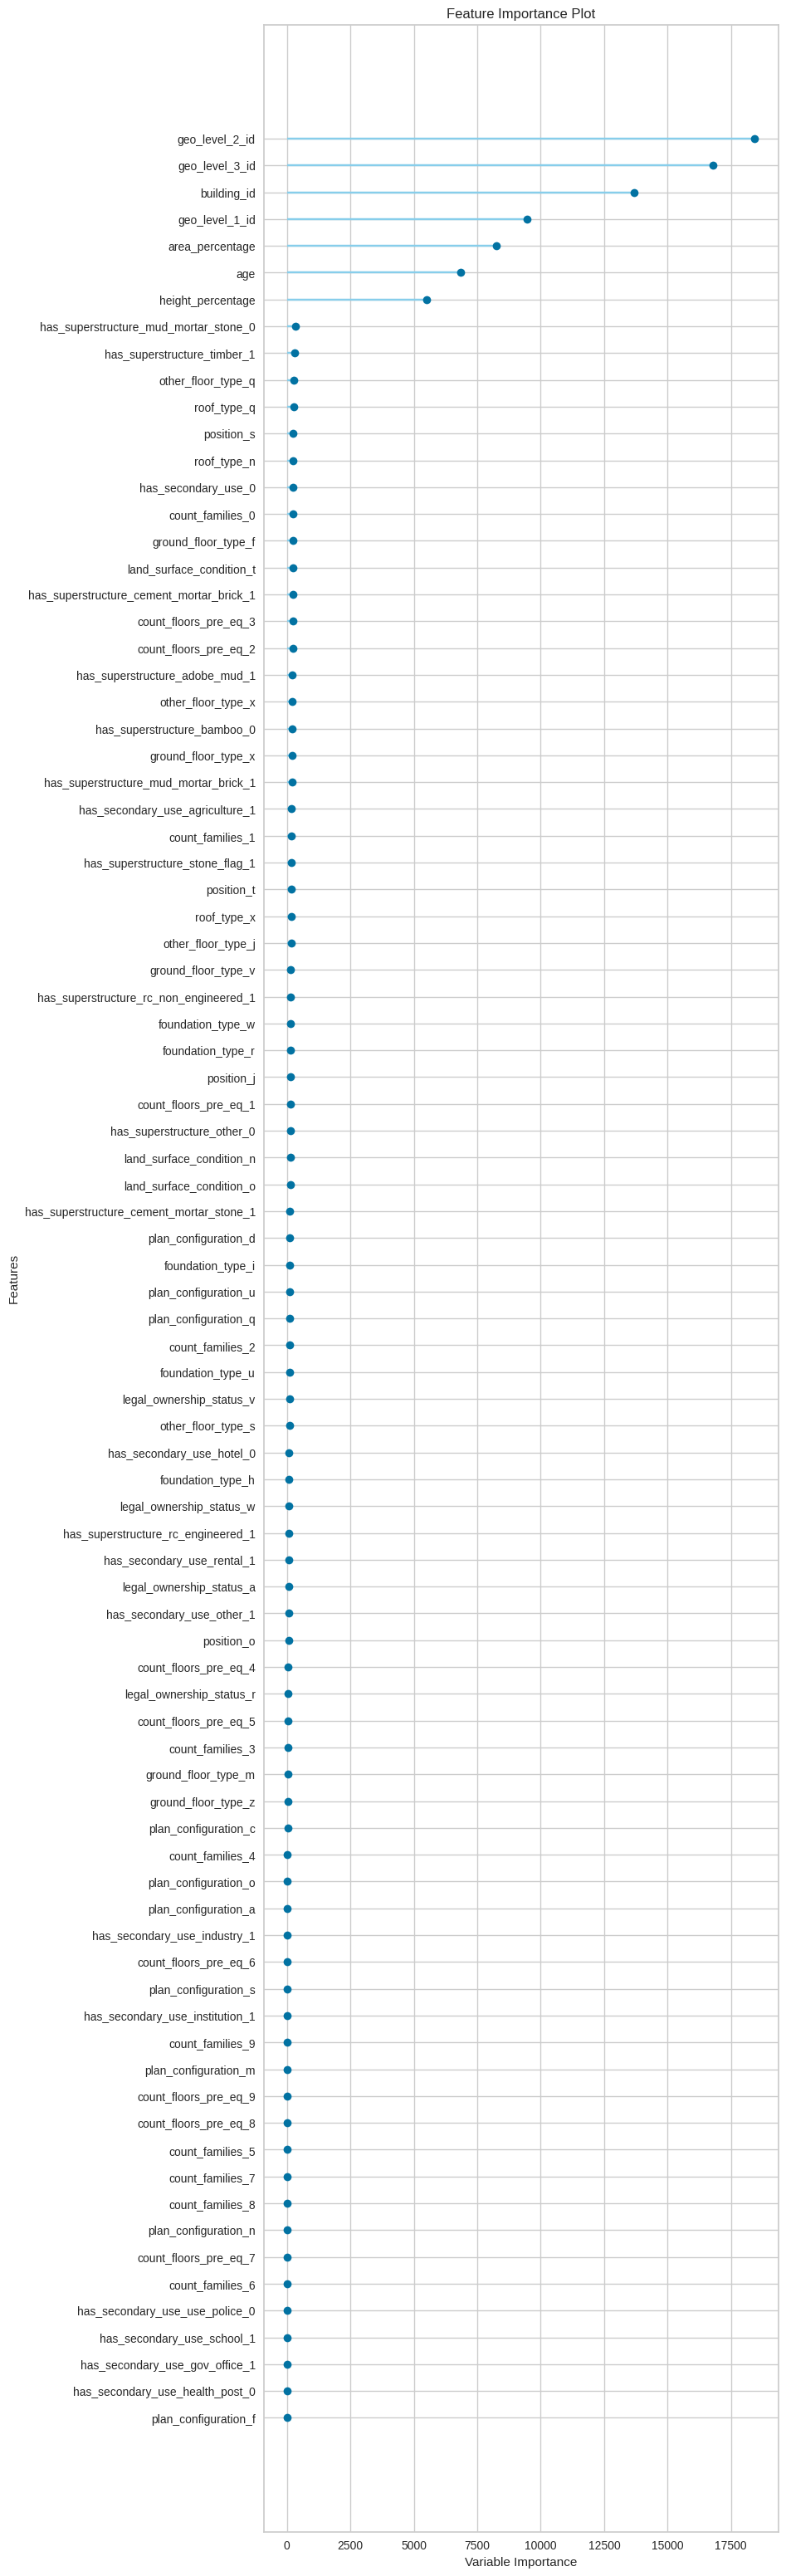

In [ ]:
plot_model(tunned_model, plot = 'feature_all')

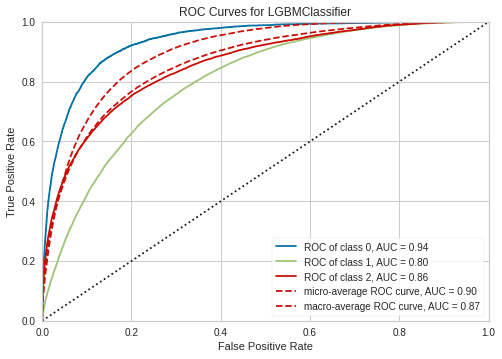

In [ ]:
plot_model(tunned_model, plot = 'auc')

In [ ]:
plot_model(tunned_model, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.15
max_depth,-1
min_child_samples,91
min_child_weight,0.001
min_split_gain,0.1
n_estimators,300


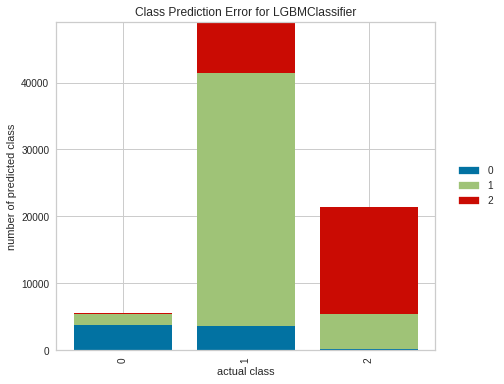

In [ ]:
plot_model(tunned_model, plot = 'error')

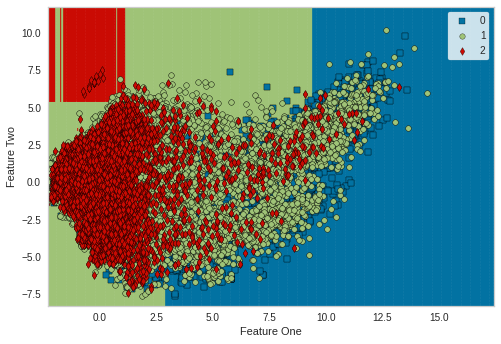

In [ ]:
plot_model(tunned_model, plot='boundary')

In [ ]:
final_knn = finalize_model(tunned_model)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [ ]:
save_model(final_knn,'Model_tuned_2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='damage_grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.15,
                                 max_depth=-1, min_child_samples=91,
           

In [3]:
saved_final_knn = load_model('Model_tuned_2')

Transformation Pipeline and Model Successfully Loaded


In [20]:
predictions = predict_model(saved_final_knn, data=df_test_values)

In [21]:
predictions.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,Label,Score
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.7898
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,1,0.8184
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1,0.7892
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,0,0.6782
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.7018


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, predictions.Label, 'R2')

In [ ]:
target = []

for n in predictions.Label:
    if n == 0:
        target.append(1)
    elif n == 1:
        target.append(2)
    elif n == 2:
        target.append(3)

In [ ]:
predictions["damage_grade"] = target

In [ ]:
predictions[["building_id","damage_grade"]].to_csv('envio_test10.csv', index=False)

# Treinamento 2

In [ ]:
df_train_values = pd.read_csv("train_values.csv")

In [ ]:
df_train__label_values = pd.read_csv("train_labels.csv")

In [ ]:
df_train = pd.merge(df_train_values,df_train__label_values,how='inner',on='building_id')

In [ ]:
target = []

for n in df_train.damage_grade:
    if n == 1:
        target.append(0)
    elif n == 2:
        target.append(1)
    elif n == 3:
        target.append(2)

In [ ]:
df_train["damage_grade"] = target

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
df,df_y = rus.fit_resample(df_train,df_train.damage_grade)

In [ ]:
df_train = df.copy()
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,0
1,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,0
2,864809,13,305,5956,2,0,9,8,t,r,q,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,0
3,440102,7,157,5265,1,5,11,3,n,i,x,v,j,t,d,0,0,0,0,0,0,0,0,1,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,0
4,402996,26,762,742,1,0,15,3,n,u,x,v,j,s,d,0,1,0,0,0,1,0,0,0,0,1,v,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75367,19934,21,336,6872,2,10,6,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
75368,927,21,23,7088,2,5,10,5,t,r,n,x,x,t,d,0,1,0,0,0,0,1,0,0,0,1,v,1,0,0,0,0,0,0,0,0,0,0,0,2
75369,488538,17,1381,482,3,35,9,7,n,r,n,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
75370,116080,21,727,1576,2,20,6,3,o,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,1,0,0,0,0,0,0,0,0,0,1,2


In [ ]:
%%time
clf1 = setup(data = df_train, target = 'damage_grade', session_id = 786, silent = True,use_gpu=True)

,Description,Value
0,session_id,786
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(75372, 40)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


CPU times: user 10.7 s, sys: 354 ms, total: 11.1 s
Wall time: 12.7 s


In [ ]:
%%time
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6941,0.8594,0.6943,0.6908,0.6921,0.5412,0.5415,2.053
rf,Random Forest Classifier,0.6805,0.8482,0.6807,0.6773,0.6785,0.5208,0.5212,14.442
gbc,Gradient Boosting Classifier,0.6663,0.8394,0.6665,0.6669,0.6665,0.4995,0.4996,47.078
et,Extra Trees Classifier,0.6612,0.8323,0.6614,0.6581,0.6592,0.4919,0.4923,17.424
ada,Ada Boost Classifier,0.6368,0.7978,0.6370,0.6359,0.6360,0.4552,0.4555,3.727
dt,Decision Tree Classifier,0.6212,0.7158,0.6213,0.6223,0.6216,0.4318,0.4318,0.875
ridge,Ridge Classifier,0.5743,0.0000,0.5747,0.5791,0.5699,0.3617,0.3668,0.150
lda,Linear Discriminant Analysis,0.5735,0.7577,0.5736,0.5881,0.5782,0.3603,0.3616,0.993
qda,Quadratic Discriminant Analysis,0.4012,0.5512,0.4015,0.4473,0.3868,0.1021,0.1105,0.565
nb,Naive Bayes,0.3857,0.6333,0.3866,0.4685,0.2798,0.0797,0.1441,0.114


CPU times: user 16min 14s, sys: 41.5 s, total: 16min 56s
Wall time: 18min 16s


In [ ]:
%%time
tunned_model = tune_model(best_model, optimize = 'F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7195,0.8735,0.7196,0.7181,0.7187,0.5792,0.5793
1,0.7134,0.8723,0.7136,0.7099,0.7110,0.5701,0.5706
2,0.7223,0.8772,0.7224,0.7201,0.7210,0.5835,0.5836
3,0.7271,0.8775,0.7272,0.7254,0.7260,0.5906,0.5908
4,0.7142,0.8729,0.7143,0.7117,0.7128,0.5713,0.5714
5,0.7108,0.8686,0.7109,0.7079,0.7084,0.5661,0.5669
6,0.7094,0.8707,0.7096,0.7101,0.7097,0.5641,0.5642
7,0.7178,0.8724,0.7179,0.7162,0.7169,0.5767,0.5768
8,0.7056,0.8665,0.7058,0.7028,0.7037,0.5585,0.5588


CPU times: user 56.9 s, sys: 3.24 s, total: 1min
Wall time: 52min 2s


In [ ]:
final_knn = finalize_model(tunned_model)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

In [ ]:
save_model(final_knn,'Model Balanceado')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='damage_grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
       

In [ ]:
saved_final_knn = load_model('Model Balanceado')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
df_test_values = pd.read_csv("test_values.csv")

In [ ]:
predictions = predict_model(saved_final_knn, data=df_test_values)

In [ ]:
target = []

for n in predictions.Label:
    if n == 0:
        target.append(1)
    elif n == 1:
        target.append(2)
    elif n == 2:
        target.append(3)

In [ ]:
predictions["damage_grade"] = target
predictions[["building_id","damage_grade"]].to_csv('envio_test2.csv', index=False)

# Treinamento 3

In [ ]:
import os 
import numpy as np
import pandas as pd

import lightgbm as lgb

import keras 
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

from sklearn.metrics import f1_score 
from sklearn.model_selection import KFold

In [ ]:
df_train_values = pd.read_csv("train_values.csv")

In [ ]:
df_train__label_values = pd.read_csv("train_labels.csv")

In [ ]:
df_train = pd.merge(df_train_values,df_train__label_values,how='inner',on='building_id')

## Geographic Location ID Embedding w/ Autoencoder

In [ ]:
train_x = pd.read_csv("train_values.csv")
train_y = pd.read_csv("train_labels.csv")
test_x  = pd.read_csv("test_values.csv")

In [ ]:
geo1 = np.array(pd.get_dummies(pd.concat([train_x["geo_level_1_id"], test_x["geo_level_1_id"]])))
geo2 = np.array(pd.get_dummies(pd.concat([train_x["geo_level_2_id"], test_x["geo_level_2_id"]])))
geo3 = np.array(pd.get_dummies(pd.concat([train_x["geo_level_3_id"], test_x["geo_level_3_id"]])))

In [ ]:
geo3.shape

(347469, 11861)

In [ ]:
def NET():
    inp = Input((geo3.shape[1],))
    i1 = Dense(16, name="intermediate")(inp)
    x2 = Dense(geo2.shape[1], activation='sigmoid')(i1)
    x1 = Dense(geo1.shape[1], activation='sigmoid')(i1)

    model = Model(inp, [x2,x1])
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

In [ ]:
model = NET()
model.fit(geo3, [geo2, geo1], batch_size=128, epochs=10, verbose=2)
model.save("geo_embed.h5")

KeyboardInterrupt: ignored

In [ ]:
# Load GEO-Embed Model
model = NET()
model.load_weights("geo_embed.h5")

In [ ]:
# "Extract Intermediate Layer" Function
from keras import backend as K

get_int_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

In [ ]:
model.layers[0].input

<KerasTensor: shape=(None, 11861) dtype=float32 (created by layer 'input_2')>

In [ ]:
model.layers[1].output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'intermediate')>

In [ ]:
get_int_layer_output([[geo3[1:2]]])[0]

array([[-0.13924208, -1.3546923 , -1.5918133 ,  1.0616004 , -0.42495131,
        -0.8546643 , -1.8275061 , -0.651464  , -0.76363033, -1.4790959 ,
        -1.7559047 ,  0.20442343,  1.4823964 , -1.0560299 ,  1.0567691 ,
        -0.1682337 ]], dtype=float32)

In [ ]:
# Extract GEO-Embeds for all train data points.
# Then assign with train_data

from tqdm import tqdm

out = []

contador = 0
for dat in tqdm(range(1,len(geo3[:260601]))):
    dat = geo3[contador:dat]
    layer_output = get_int_layer_output([[dat]])[0]
    out.append(layer_output)
    contador = contador + 1

out = np.array(out)
out = np.squeeze(out)

100%|██████████| 260600/260600 [05:21<00:00, 809.97it/s]


In [ ]:
train_x = train_x[:260600]
train_data = pd.get_dummies(train_x.copy())
train_data = train_data[:260600]

In [ ]:
train_data = pd.get_dummies(train_x.copy())
train_data = train_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
train_data = train_data.assign(geo_feat1=out[:,0],
                               geo_feat2=out[:,1],
                               geo_feat3=out[:,2],  
                               geo_feat4=out[:,3],
                               geo_feat5=out[:,4],    
                               geo_feat6=out[:,5],
                               geo_feat7=out[:,6],
                               geo_feat8=out[:,7],
                               geo_feat9=out[:,8],
                               geo_feat10=out[:,9],
                               geo_feat11=out[:,10],
                               geo_feat12=out[:,11],
                               geo_feat13=out[:,12],
                               geo_feat14=out[:,13],
                               geo_feat15=out[:,14],           
                               geo_feat16=out[:,15])

In [ ]:
train_data.columns

Index(['building_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition

In [ ]:
train_data#.join(df_train_values)

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.635776,-1.045560,-1.638205,-0.313037,1.430391,-1.841145,-2.448631,-0.493688,-0.494782,-1.445083,-1.544335,0.290415,1.555457,0.582434,0.730720,-2.044657
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.139242,-1.354692,-1.591813,1.061600,-0.424951,-0.854664,-1.827506,-0.651464,-0.763630,-1.479096,-1.755905,0.204423,1.482396,-1.056030,1.056769,-0.168234
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.307608,-1.603199,-2.175166,1.399685,0.594470,-1.696131,-1.891622,-1.504323,1.747722,-1.121480,0.416442,-0.813822,1.304520,-1.748321,1.643946,-1.838961
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.402594,-1.872151,-1.445945,0.396714,0.872328,0.143102,0.230918,-1.458886,0.685394,0.171136,-2.062224,2.480541,2.392489,-0.278755,1.042575,-1.497565
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.478954,-2.226675,-1.879673,-0.804392,1.414990,1.365366,-1.931112,0.035366,0.717102,-0.760244,-2.592765,2.018030,1.970740,-1.886897,1.679945,-0.259605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260595,827012,2,20,8,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.133996,-2.162835,-1.791828,0.447353,1.357453,-1.978588,-2.281157,-0.601095,-0.882301,-1.455108,-2.077218,-0.262114,1.866940,-1.098939,1.603916,0.297419
260596,688636,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.803453,-0.652348,0.626871,-0.734954,1.088298,-1.429829,-1.094336,-1.430183,-0.127520,-1.135275,-1.504417,0.213389,1.547470,-1.3

In [ ]:
df_train__label_values

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [ ]:
train_data = pd.merge(train_data,df_train__label_values,how='inner',on='building_id')

In [ ]:
target = []

for n in train_data.damage_grade:
    if n == 1:
        target.append(0)
    elif n == 2:
        target.append(1)
    elif n == 3:
        target.append(2)

In [ ]:
train_data["damage_grade"] = target

In [ ]:
train_data["damage_grade"].value_counts()

1    148259
2     87217
0     25124
Name: damage_grade, dtype: int64

## Treinamento

In [ ]:
%%time
clf1 = setup(data = train_data, target = 'damage_grade', session_id = 786, silent = True,use_gpu=True)

,Description,Value
0,session_id,786
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(260600, 83)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


CPU times: user 26.5 s, sys: 2.64 s, total: 29.1 s
Wall time: 28.9 s


In [ ]:
%%time
best_model = create_model('rf')

In [ ]:
%%time
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7304,0.8252,0.6355,0.7321,0.7220,0.4833,0.4937
1,0.7286,0.8250,0.6367,0.7308,0.7202,0.4798,0.4907
2,0.7254,0.8188,0.6319,0.7275,0.7165,0.4730,0.4842
3,0.7259,0.8222,0.6286,0.7271,0.7172,0.4742,0.4844
4,0.7334,0.8289,0.6366,0.7353,0.7248,0.4884,0.4989
5,0.7224,0.8189,0.6256,0.7240,0.7131,0.4665,0.4777
6,0.7304,0.8276,0.6339,0.7317,0.7220,0.4835,0.4937
7,0.7299,0.8285,0.6377,0.7318,0.7215,0.4827,0.4934
8,0.7341,0.8280,0.6373,0.7373,0.7251,0.4887,0.5008


CPU times: user 3min 36s, sys: 1.12 s, total: 3min 37s
Wall time: 1min 53s


In [ ]:
%%time
tunned_model = tune_model(best_model, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7423,0.8400,0.6662,0.7416,0.7373,0.5150,0.5204
1,0.7438,0.8405,0.6690,0.7435,0.7387,0.5174,0.5233
2,0.7388,0.8331,0.6630,0.7382,0.7335,0.5082,0.5141
3,0.7414,0.8384,0.6633,0.7407,0.7361,0.5122,0.5177
4,0.7477,0.8442,0.6692,0.7473,0.7426,0.5248,0.5305
5,0.7401,0.8356,0.6600,0.7394,0.7344,0.5094,0.5156
6,0.7411,0.8398,0.6580,0.7406,0.7353,0.5108,0.5172
7,0.7434,0.8434,0.6691,0.7428,0.7385,0.5179,0.5233
8,0.7470,0.8435,0.6693,0.7470,0.7416,0.5223,0.5287


CPU times: user 5min 11s, sys: 3.52 s, total: 5min 15s
Wall time: 37min 36s


In [ ]:
final_knn = finalize_model(tunned_model)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

In [ ]:
save_model(final_knn,'Model Rede 2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='damage_grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=66,
            

In [ ]:
saved_final_knn = load_model('Model Rede 2')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Extract GEO-Embeds for all test data points.
# Then assign with test_data

out = []

contador = 0
for dat in tqdm(range(1,len(geo3[260601:]))):
    dat = geo3[contador:dat]
    layer_output = get_int_layer_output([[dat]])[0]
    out.append(layer_output)
    contador = contador + 1

out = np.array(out)
out = np.squeeze(out)

100%|██████████| 86867/86867 [01:49<00:00, 790.28it/s]


In [ ]:
train_x = pd.read_csv("train_values.csv")
train_y = pd.read_csv("train_labels.csv")
test_x  = pd.read_csv("test_values.csv")

In [ ]:
test_x = test_x[:86867]
test_data = test_x[:86867]

In [ ]:
test_data = pd.get_dummies(test_x.copy())
test_data = test_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
test_data = test_data.assign(geo_feat1=out[:,0],
                             geo_feat2=out[:,1],
                             geo_feat3=out[:,2],  
                             geo_feat4=out[:,3],
                             geo_feat5=out[:,4],    
                             geo_feat6=out[:,5],
                             geo_feat7=out[:,6],
                             geo_feat8=out[:,7],
                             geo_feat9=out[:,8],
                             geo_feat10=out[:,9],
                             geo_feat11=out[:,10],
                             geo_feat12=out[:,11],
                             geo_feat13=out[:,12],
                             geo_feat14=out[:,13],
                             geo_feat15=out[:,14],           
                             geo_feat16=out[:,15])

In [ ]:
predictions = predict_model(saved_final_knn, data=test_data)

In [ ]:
target = []

for n in predictions.Label:
    if n == 0:
        target.append(1)
    elif n == 1:
        target.append(2)
    elif n == 2:
        target.append(3)

In [ ]:
predictions["damage_grade"] = target
predictions[["building_id","damage_grade"]].to_csv('envio_test4.csv', index=False)

# ensemble_model

In [ ]:
%%time
clf1 = setup(data = df_train, target = 'damage_grade', session_id = 786, silent = True)

,Description,Value
0,session_id,786
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(260601, 40)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


CPU times: user 31.3 s, sys: 1.27 s, total: 32.5 s
Wall time: 34.1 s


In [ ]:
%%time
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7080,0.8042,0.6093,0.7086,0.6983,0.4391,0.4496
1,0.7112,0.8072,0.6128,0.7137,0.7008,0.4429,0.4551
2,0.7078,0.8000,0.6038,0.7094,0.6968,0.4358,0.4484
3,0.7106,0.8046,0.6049,0.7118,0.7001,0.4420,0.4533
4,0.7120,0.8045,0.6073,0.7123,0.7021,0.4464,0.4568
5,0.7128,0.8014,0.6147,0.7133,0.7035,0.4493,0.4594
6,0.7056,0.8035,0.6020,0.7059,0.6952,0.4334,0.4444
7,0.7146,0.8078,0.6173,0.7155,0.7053,0.4525,0.4630
8,0.7110,0.8060,0.6110,0.7123,0.7011,0.4442,0.4554


CPU times: user 2min 19s, sys: 3.8 s, total: 2min 23s
Wall time: 1min 19s


In [ ]:
bagged_dt = ensemble_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7067,0.8028,0.6071,0.7080,0.6964,0.4350,0.4465
1,0.7097,0.8057,0.6081,0.7121,0.6989,0.4392,0.4517
2,0.7072,0.7984,0.6029,0.7091,0.6960,0.4342,0.4471
3,0.7093,0.8045,0.6036,0.7107,0.6985,0.4389,0.4508
4,0.7097,0.8040,0.6016,0.7104,0.6990,0.4403,0.4517
5,0.7079,0.7997,0.6050,0.7088,0.6975,0.4376,0.4489
6,0.7046,0.8031,0.6007,0.7051,0.6941,0.4313,0.4426
7,0.7126,0.8070,0.6123,0.7141,0.7025,0.4469,0.4584
8,0.7101,0.8053,0.6065,0.7118,0.6995,0.4407,0.4528


In [ ]:
bagged_dt_1 = ensemble_model(best_model, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7060,0.8032,0.6035,0.7079,0.6951,0.4321,0.4444
1,0.7074,0.7999,0.6014,0.7092,0.6961,0.4342,0.4469
2,0.7087,0.8013,0.6037,0.7094,0.6982,0.4389,0.4502
3,0.7078,0.8037,0.6049,0.7088,0.6974,0.4374,0.4489
4,0.7095,0.8034,0.6067,0.7111,0.6991,0.4401,0.4519
Mean,0.7079,0.8023,0.6040,0.7093,0.6972,0.4365,0.4485
Std,0.0012,0.0015,0.0017,0.0010,0.0014,0.0030,0.0026


In [ ]:
boosted_dt = ensemble_model(best_model, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7067,0.8028,0.6071,0.7080,0.6964,0.4350,0.4465
1,0.7097,0.8057,0.6081,0.7121,0.6989,0.4392,0.4517
2,0.7072,0.7984,0.6029,0.7091,0.6960,0.4342,0.4471
3,0.7093,0.8045,0.6036,0.7107,0.6985,0.4389,0.4508
4,0.7097,0.8040,0.6016,0.7104,0.6990,0.4403,0.4517
5,0.7079,0.7997,0.6050,0.7088,0.6975,0.4376,0.4489
6,0.7046,0.8031,0.6007,0.7051,0.6941,0.4313,0.4426
7,0.7126,0.8070,0.6123,0.7141,0.7025,0.4469,0.4584
8,0.7101,0.8053,0.6065,0.7118,0.6995,0.4407,0.4528


In [ ]:
boosted_dt = ensemble_model(best_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7164,0.7310,0.6402,0.7145,0.7109,0.4664,0.4714
1,0.7160,0.7346,0.6373,0.7146,0.7100,0.4640,0.4696
2,0.7142,0.7313,0.6338,0.7124,0.7082,0.4612,0.4666
3,0.7157,0.7343,0.6351,0.7138,0.7097,0.4638,0.4690
4,0.7121,0.7347,0.6280,0.7100,0.7060,0.4573,0.4626
5,0.7163,0.7345,0.6350,0.7145,0.7103,0.4652,0.4706
6,0.7083,0.7328,0.6231,0.7055,0.7022,0.4503,0.4551
7,0.7190,0.7332,0.6394,0.7169,0.7135,0.4715,0.4763
8,0.7175,0.7343,0.6398,0.7161,0.7116,0.4676,0.4731


In [ ]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6795,0.7701,0.5660,0.6830,0.6628,0.3711,0.3896
1,0.6834,0.7747,0.5711,0.6898,0.6657,0.3761,0.3975
2,0.6799,0.7667,0.5657,0.6850,0.6623,0.3702,0.3906
3,0.6842,0.7736,0.5666,0.6881,0.6675,0.3795,0.3984
4,0.6818,0.7723,0.5641,0.6852,0.6652,0.3755,0.3940
5,0.6802,0.7677,0.5626,0.6848,0.6627,0.3710,0.3911
6,0.6799,0.7715,0.5631,0.6834,0.6629,0.3714,0.3903
7,0.6830,0.7732,0.5707,0.6872,0.6666,0.3785,0.3975
8,0.6838,0.7752,0.5694,0.6895,0.6666,0.3781,0.3987


In [ ]:
blend_model = blend_models([lightgbm,rf,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7092,0.8097,0.6045,0.7118,0.6978,0.4373,0.4508
1,0.7192,0.8132,0.6133,0.7250,0.7072,0.4541,0.4702
2,0.7120,0.8065,0.6024,0.7165,0.6994,0.4398,0.4558
3,0.7169,0.8122,0.6051,0.7204,0.7050,0.4506,0.4651
4,0.7144,0.8110,0.6020,0.7173,0.7026,0.4463,0.4603
5,0.7131,0.8080,0.6050,0.7165,0.7014,0.4440,0.4584
6,0.7088,0.8086,0.5986,0.7112,0.6969,0.4357,0.4495
7,0.7152,0.8130,0.6081,0.7187,0.7038,0.4484,0.4625
8,0.7180,0.8140,0.6097,0.7227,0.7062,0.4526,0.4679


In [ ]:
def salva_modelo (modelo,nome):

  final_knn = finalize_model(modelo)

  save_model(final_knn,nome)

In [ ]:
df_test_values = pd.read_csv("test_values.csv")

predictions = predict_model(blend_model, data=df_test_values)

target = []

for n in predictions.Label:
    if n == 0:
        target.append(1)
    elif n == 1:
        target.append(2)
    elif n == 2:
        target.append(3)

predictions["damage_grade"] = target
predictions[["building_id","damage_grade"]].to_csv('envio_test6.csv', index=False)

In [ ]:
from sklearn.metrics import f1_score

f1_score(df_test_values["damage_grade"], predictions["damage_grade"], average='micro')

In [ ]:
tuned_model = tune_model(blend_model, optimize = 'F1', n_iter = 10)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:09:34
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 161.7min


In [ ]:
df_test_values = pd.read_csv("test_values.csv")

predictions = predict_model(tuned_model, data=df_test_values)

target = []

for n in predictions.Label:
    if n == 0:
        target.append(1)
    elif n == 1:
        target.append(2)
    elif n == 2:
        target.append(3)

predictions["damage_grade"] = target
predictions[["building_id","damage_grade"]].to_csv('envio_test7.csv', index=False)

# Utilizando Técnica de Normalização e Aumentando tunagem do Treinamento 1

In [ ]:
import os 
import numpy as np
import pandas as pd

import lightgbm as lgb

import keras 
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

from sklearn.metrics import f1_score 
from sklearn.model_selection import KFold

In [ ]:
train_x = pd.read_csv("train_values.csv")
train_y = pd.read_csv("train_labels.csv")
test_x  = pd.read_csv("test_values.csv")

train_x = pd.get_dummies(train_x.copy())

In [ ]:
print(train_x.shape)
print(train_y.shape)

(260601, 69)
(260601, 2)


In [ ]:
df_train = pd.merge(train_x,train_y,how='inner',on='building_id')

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(df_train.shape)

(260601, 69)
(260601, 2)
(260601, 70)


In [ ]:
target = []

for n in df_train.damage_grade:
    if n == 1:
        target.append(0)
    elif n == 2:
        target.append(1)
    elif n == 3:
        target.append(2)

df_train["damage_grade"] = target

In [ ]:
target = []

for n in train_y.damage_grade:
    if n == 1:
        target.append(0)
    elif n == 2:
        target.append(1)
    elif n == 3:
        target.append(2)

train_y["damage_grade"] = target

In [ ]:
y = np.array(train_y["damage_grade"])

df = df_train.drop(["building_id"], axis=1)
x = np.array(df)

kf = KFold(n_splits=5, shuffle=True, random_state=321)

In [ ]:
print(y.shape)
print(x.shape)

(260601,)
(260601, 69)


In [ ]:
def threshold_arr(array):
    # Get major confidence-scored predicted value.
    new_arr = []
    for ix, val in enumerate(array):
        loc = np.array(val).argmax(axis=0)
        k = list(np.zeros((len(val))))
        k[loc]=1
        new_arr.append(k)
        
    return np.array(new_arr)

In [ ]:
for ix, (train_index, test_index) in enumerate(kf.split(x)):
    lgb_params = {
        "objective" : "multiclass",
        "num_class":3,
        "metric" : "multi_error",
        "boosting": 'gbdt',
        "max_depth" : -1,
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "feature_fraction" : 0.5,
        "min_sum_hessian_in_leaf" : 0.1,
        "max_bin":8192,
        "verbosity" : 1,
        "num_threads":6,
        "seed": 321
    }

    x_train, x_val, y_train, y_val = x[train_index], x[test_index], y[train_index], y[test_index]

    train_data = lgb.Dataset(x_train, label=y_train)
    val_data   = lgb.Dataset(x_val, label=y_val)

    lgb_clf = lgb.train(lgb_params,
                        train_data,
                        20000,
                        valid_sets = [val_data],
                        early_stopping_rounds=3000,
                        verbose_eval = 1000)

    y_pred = lgb_clf.predict(x_val)
    print("F1-MICRO SCORE: ", f1_score(np.array(pd.get_dummies(y_val)), threshold_arr(y_pred), average='micro'))
    lgb_clf.save_model(f'{ix}.txt')

Training until validation scores don't improve for 3000 rounds.
[10]	valid_0's multi_error: 5.75584e-05
[20]	valid_0's multi_error: 0
[30]	valid_0's multi_error: 0
[40]	valid_0's multi_error: 0
[50]	valid_0's multi_error: 0
[60]	valid_0's multi_error: 0
[70]	valid_0's multi_error: 0
[80]	valid_0's multi_error: 0
[90]	valid_0's multi_error: 0
[100]	valid_0's multi_error: 0
[110]	valid_0's multi_error: 0
[120]	valid_0's multi_error: 0
[130]	valid_0's multi_error: 0
[140]	valid_0's multi_error: 0
[150]	valid_0's multi_error: 0
[160]	valid_0's multi_error: 0
[170]	valid_0's multi_error: 0
[180]	valid_0's multi_error: 0
[190]	valid_0's multi_error: 0
[200]	valid_0's multi_error: 0
[210]	valid_0's multi_error: 0
[220]	valid_0's multi_error: 0
[230]	valid_0's multi_error: 0
[240]	valid_0's multi_error: 0
[250]	valid_0's multi_error: 0
[260]	valid_0's multi_error: 0
[270]	valid_0's multi_error: 0
[280]	valid_0's multi_error: 0
[290]	valid_0's multi_error: 0
[300]	valid_0's multi_error: 0
[310]

In [ ]:
# Load all LightGB Models and concatenate.
models = []
for i in range(5):
    model = lgb.Booster(model_file=f'{i}.txt')

    y_pred = model.predict(x)
    score  = f1_score(np.array(pd.get_dummies(y)), threshold_arr(y_pred), average='micro')
    print("F1-MICRO SCORE: ", score)
    models.append(model)

F1-MICRO SCORE:  0.9999577898780128
F1-MICRO SCORE:  1.0
F1-MICRO SCORE:  0.9999923254323659
F1-MICRO SCORE:  1.0
F1-MICRO SCORE:  1.0


In [ ]:
def ensemble(models, x):
    # Ensemble K-Fold CV models with adding all confidence score by class.
    y_preds = []
    
    for model in models:
        y_pred = model.predict(x)
        y_preds.append(y_pred)
        
    init_y_pred = y_preds[0]
    for ypred in y_preds[1:]:
        init_y_pred += ypred
        
    y_pred = threshold_arr(init_y_pred)
    
    return y_pred

In [ ]:
df = test_x.drop(["building_id"], axis=1)
df = pd.get_dummies(df.copy())
x = np.array(df)

In [ ]:
x

array([[   17,   596, 11307, ...,     0,     1,     0],
       [    6,   141, 11987, ...,     0,     1,     0],
       [   22,    19, 10044, ...,     0,     1,     0],
       ...,
       [   22,  1136,  7712, ...,     0,     1,     0],
       [    6,  1041,   912, ...,     0,     0,     0],
       [   26,    36,  6436, ...,     0,     1,     0]])

In [ ]:
y_pred = ensemble(models, x)
y_pred = y_pred.argmax(axis=1)+1

In [ ]:
sub_csv = pd.read_csv("submission_format.csv")
sub_csv["damage_grade"] = y_pred
sub_csv.to_csv("submission.csv", index=False)